# Importando dependencias 

In [1]:
import cv2
import imutils
import easyocr
import numpy as np
from matplotlib import pyplot as plt

# Parte donde se selecciona la imagen para identificar la placa

In [2]:
from PyQt5.QtWidgets import QApplication, QFileDialog

# crea la aplicación de Qt
app = QApplication([])

# seleccionar un archivo
file_dialog = QFileDialog()
file_path, _ = file_dialog.getOpenFileName()

# muestra el archivo seleccionado
print("Selected file:", file_path)

# cerrar la aplicación de Qt
app.quit()

Selected file: C:/Users/Sjvn/Desktop/URL/Inteligencia Artificial/Jupyter-clases/dataSet/jpg/ej02-auto.jpg


# La imagen seleccionada, ahora en escala de grises y desenfocar a la vez 
# En caso de no seleccionar una imagen, debe escribir la ruta del archivo

In [3]:
img = cv2.imread(file_path)

#img = cv2.imread("../dataSet/jpg/ej03-auto.jpg")

Imagen a Analizar


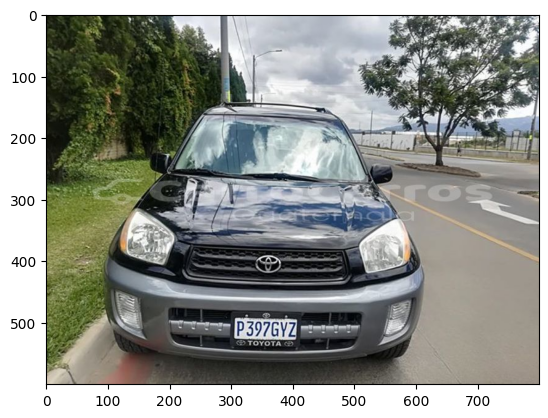

In [12]:
print("Imagen a Analizar")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Imagen Analizada en Gris


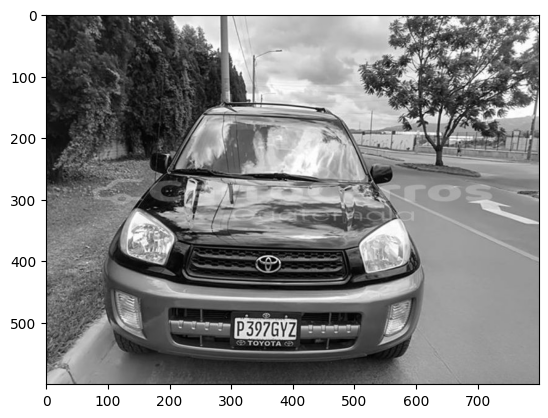

In [14]:
print("Imagen Analizada en Gris")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB));

In [15]:
# Aplicar filtro blur
gray = cv2.blur(gray, (3, 3))

Imagen Analizada en Gris con Filtro Blur


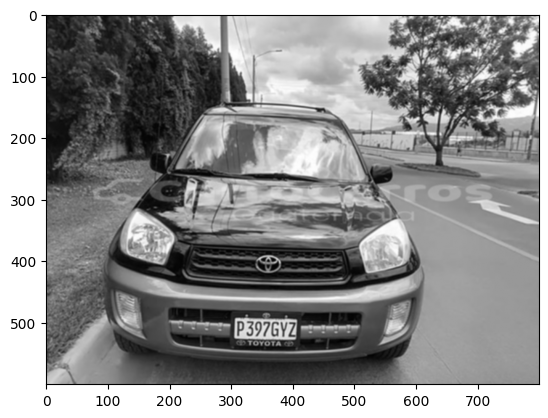

In [16]:
print("Imagen Analizada en Gris con Filtro Blur")
plt.imshow(gray, cmap="gray");

# Aplicar filtro y localizar border para determinar la localización de la placa

In [17]:
# Reducción de ruido
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

# Detección de bordes
edged = cv2.Canny(bfilter, 30, 200)

Imagen Analizada con Detección de Bordes


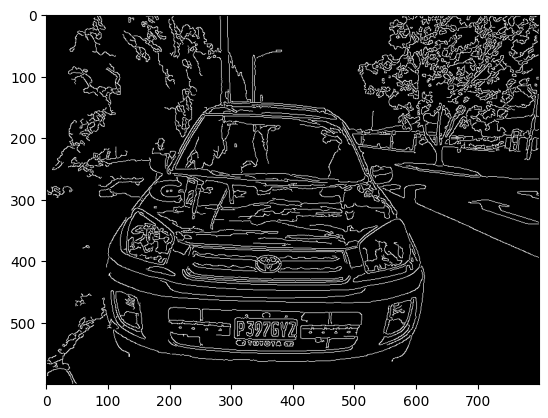

In [18]:
print("Imagen Analizada con Detección de Bordes")
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# Encontrar los contornos que pueden ser una placa y aplicar máscara 

In [19]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [20]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [21]:
print(f"Posible ubicación de la placa:\n{location}")

Posible ubicación de la placa:
[[[306 494]]

 [[307 526]]

 [[405 527]]

 [[406 495]]]


In [ ]:
# Máscara, para aislar la placa (todo lo que no sea la placa se vuelve negro)
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

Imagen analizada con la placa detectada


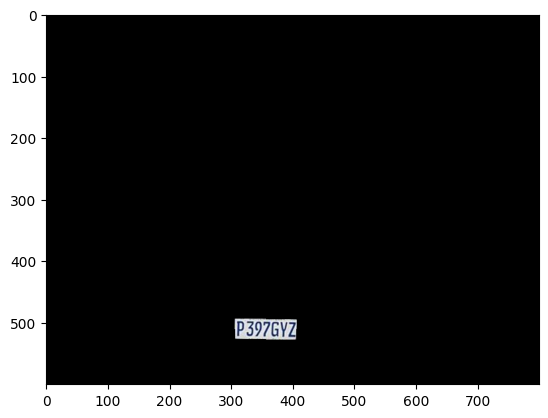

In [23]:
print("Imagen analizada con la placa detectada")
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB));

In [ ]:
# Se toma la ubicación resaltada y se extrae
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
cropped = gray[topx : bottomx + 1, topy : bottomy + 1]

Imagen analizada, ahora solo con la placa recortada


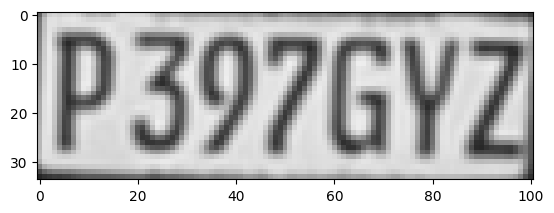

In [25]:
print("Imagen analizada, ahora solo con la placa recortada")
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB));

# Una vez ubicada la placa, utilizar Easy OCR para poder leer el texto de la imagen (la placa)

In [26]:
reader = easyocr.Reader(["en"])
result = reader.readtext(cropped)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [27]:
print("Texto detectado en la imagen (el texto es la placa)")
print(result)

Texto detectado en la imagen (el texto es la placa)
[([[0, 0], [101, 0], [101, 34], [0, 34]], 'P3O7GYZ', np.float64(0.2715249347868438))]


# Una vez se obtuvo la placa, mostrar los resultados 

In [28]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(
    img,
    text=text,
    org=(approx[0][0][0], approx[1][0][1] + 60),
    fontFace=font,
    fontScale=1,
    color=(0, 255, 0),
    thickness=2,
    lineType=cv2.LINE_AA,
)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

Imagen analizada con la placa detectada y el texto de la placa


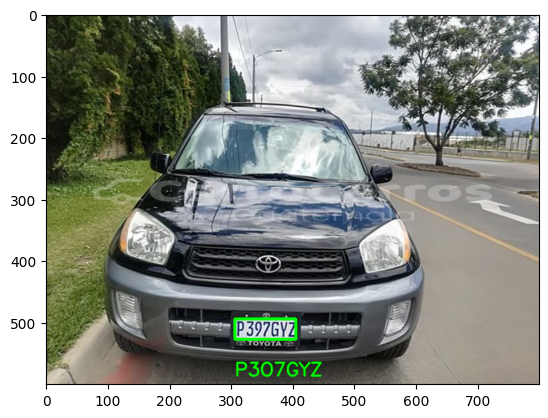

In [29]:
print("Imagen analizada con la placa detectada y el texto de la placa")
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB));